# CS5661 Homework 2
### Jagannathan Chengavalli Lakshminarayanan - 305834859

In [1]:
%matplotlib inline
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

# Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

In [2]:
# reading a CSV file directly from Web, and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local device:
#iris_df = pd.read_csv('C:/Users/harish/Desktop/Fall17/CS4661/Lectures/HW/HW3/Heart_s.csv')

PATH = 'C:/Users/harish/Desktop/Spring18/CS5661/HW/HW2/Digit/'

img0 = mpimg.imread('C:/Users/harish/Desktop/Spring18/CS5661/HW/HW2/Digit/0.jpg')

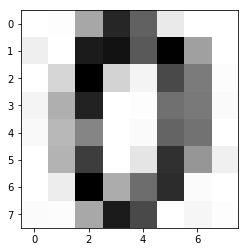

In [3]:
plt.imshow(img0,cmap=plt.cm.gray_r,interpolation='nearest')

In [4]:
# It includes 1797 small images (8x8 pixels), each one includes a hand-written digit (0-9)

# Creating an array to store the 1797 images
df = np.zeros((1797,64))

# Reading all the images and storing them
for i in range (1,1797):
    img = mpimg.imread('C:/Users/harish/Desktop/Spring18/CS5661/HW/HW2/Digit/'+ str(i)+'.jpg')
    reshape = img.reshape(64)
    df[i] = np.copy(reshape)

print(df)

[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.   11. ...,  157.    0.   12.]
 [   0.    0.    5. ...,  255.  138.    0.]
 ..., 
 [   5.    0.   22. ...,   87.   21.    0.]
 [   7.    0.   22. ...,  196.    0.    7.]
 [   0.   17.  155. ...,  198.   26.    0.]]


In [5]:
# Creating the Feature Matrix for the dataset:

X = pd.DataFrame(df)  
#print (X [0::10])

# select a Series of labels (the last column) from the DataFrame
label = pd.read_csv('C:/Users/harish/Desktop/Spring18/CS5661/HW/HW2/label.csv')

y = label['digit']
#print (y [0::100])

In [6]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.1" means that pick 10% of data samples for testing set, and the rest (90%) for training set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [7]:
# "my_ANN" is instantiated as an "object" of MLPClassifier "class". 
# hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.
# activation: the non-linear function. 'logistic' means Sigmoid Function!
# solver: the type of minimization problem: ‘sgd’ and 'adam' refer to stochastic gradient descent.
# alpha: regularization parameter (L2 penalty term).
# learning_rate_init: learning rate.

# 1 Hidden Layer with 80 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(80,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)


In [8]:
# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80,), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [9]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 8 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 5 6 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 8 7 8 7 5 8 4 3 9 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 1 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 9 9 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 9 7 4 8 9 5 7 6 9 4 0 4 0 0 9]


In [10]:
score_ann = accuracy_score(y_test, y_predict_ann)
print(score_ann)

0.911111111111


In [11]:
from sklearn import metrics

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)

print("Confusion matrix:")
print(cm_ANN)


Confusion matrix:
[[13  0  0  0  1  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  2]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  1  0  0]
 [ 0  0  0  0 16  0  0  1  3  1]
 [ 0  0  0  0  0 16  0  0  0  0]
 [ 0  1  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0]
 [ 0  2  0  0  0  0  0  0 16  1]
 [ 0  0  0  0  0  1  0  0  1 14]]


In [13]:
from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(50,201)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN1 = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                           learning_rate_init = 0.002)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN1, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(50,), (51,), (52,), (53,), (54,), (55,), (56,), (57,), (58,), (59,), (60,), (61,), (62,), (63,), (64,), (65,), (66,), (67,), (68,), (69,), (70,), (71,), (72,), (73,), (74,), (75,), (76,), (77,), (78,), (79,), (80,), (81,), (82,), (83,), (84,), (85,), (86,), (87,), (88,), (89,), (90,), (91,), (92,), (93,), (94,), (95,), (96,), (97,), (98,), (99,), (100,), (101,), (102,), (103,), (104,), (105,), (106,), (107,), (108,), (109,), (110,), (111,), (112,), (113,), (114,), (115,), (116,), (117,), (118,), (119,), (120,), (121,), (122,), (123,), (124,), (125,), (126,), (127,), (128,), (129,), (130,), (131,), (132,), (133,), (134,), (135,), (136,), (137,), (138,), (139,), (140,), (141,), (142,), (143,), (144,), (145,), (146,), (147,), (148,), (149,), (150,), (151,), (152,), (153,), (154,), (155,), (156,), (157,), (158,), (159,), (160,), (161,), (162,), (163,), (164,), (165,), (166,), (167,), (168,), (169,), (170,), (171,), (172,), (173,), (174,), (175,), (176,), (177,), (1